## Face Recognition

In [1]:
# import modules
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle

#### Test Image

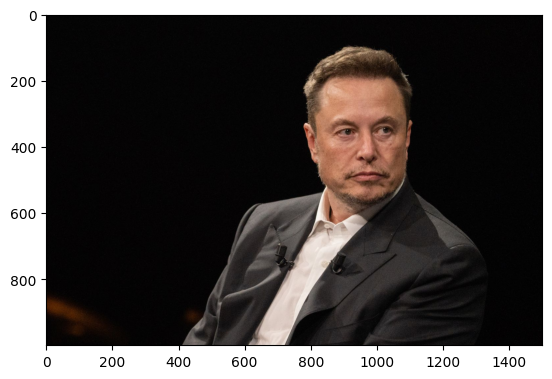

In [6]:
# melihat gambar
path = "../database/Elon Musk/02.jpg"
def read_image(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    return img

img = read_image(path)

#### Detect Face

In [7]:
# Mendeteksi muka
detector = MTCNN()
result = detector.detect_faces(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [8]:
result


[{'box': [818, 193, 272, 366],
  'confidence': 0.999996542930603,
  'keypoints': {'left_eye': (907, 352),
   'right_eye': (1026, 345),
   'nose': (978, 421),
   'mouth_left': (919, 489),
   'mouth_right': (1027, 483)}}]

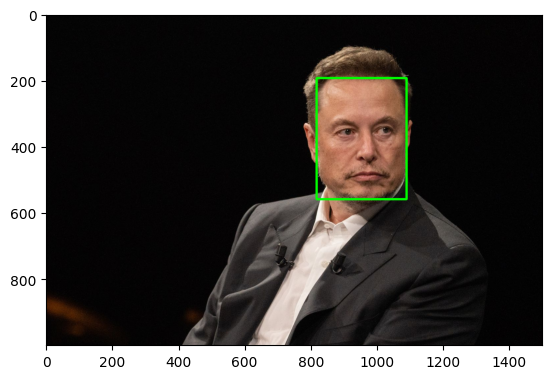

In [9]:
# bounding box
x, y, w, h = result[0]['box']

# draw bounding box on image
img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(img)

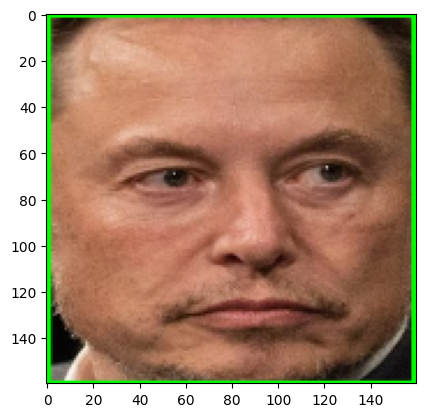

In [10]:
# get image in bounding box
my_face = img[y:y+h, x:x+w]
# resize image cause facenet uisng 160x160 image
my_face = cv.resize(my_face, (160, 160))
plt.imshow(my_face)


### Preprocessing Images

In [11]:
# extract face
def extract_face(detector, filename, target_size=(160, 160)):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x, y, w, h = detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, target_size)
    return face_arr

# load faces
def load_faces(directory, detector):
    faces = []
    for im_name in os.listdir(directory):
        try:
            path = os.path.join(directory, im_name)
            single_face = extract_face(detector, path)
            faces.append(single_face)
        except Exception as e:
            pass
    return faces

# load classes
def load_classes(directory, detector):
    X = []
    Y = []
    for sub_dir in os.listdir(directory):
        path = os.path.join(directory, sub_dir)
        faces = load_faces(path, detector)
        labels = [sub_dir for _ in range(len(faces))]
        print(f"Loaded successfully: {len(labels)}")
        X.extend(faces)
        Y.extend(labels)
    return np.asarray(X), np.asarray(Y)

# plot image
def plot_images(images, labels):
    plt.figure(figsize=(18, 16))
    for num, image in enumerate(images):
        ncols = 3
        nrows = len(labels) // ncols + 1
        plt.subplot(nrows, ncols, num + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [17]:
# preprocessing data
path = "../database/"
x, y = load_classes(path, detector)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━

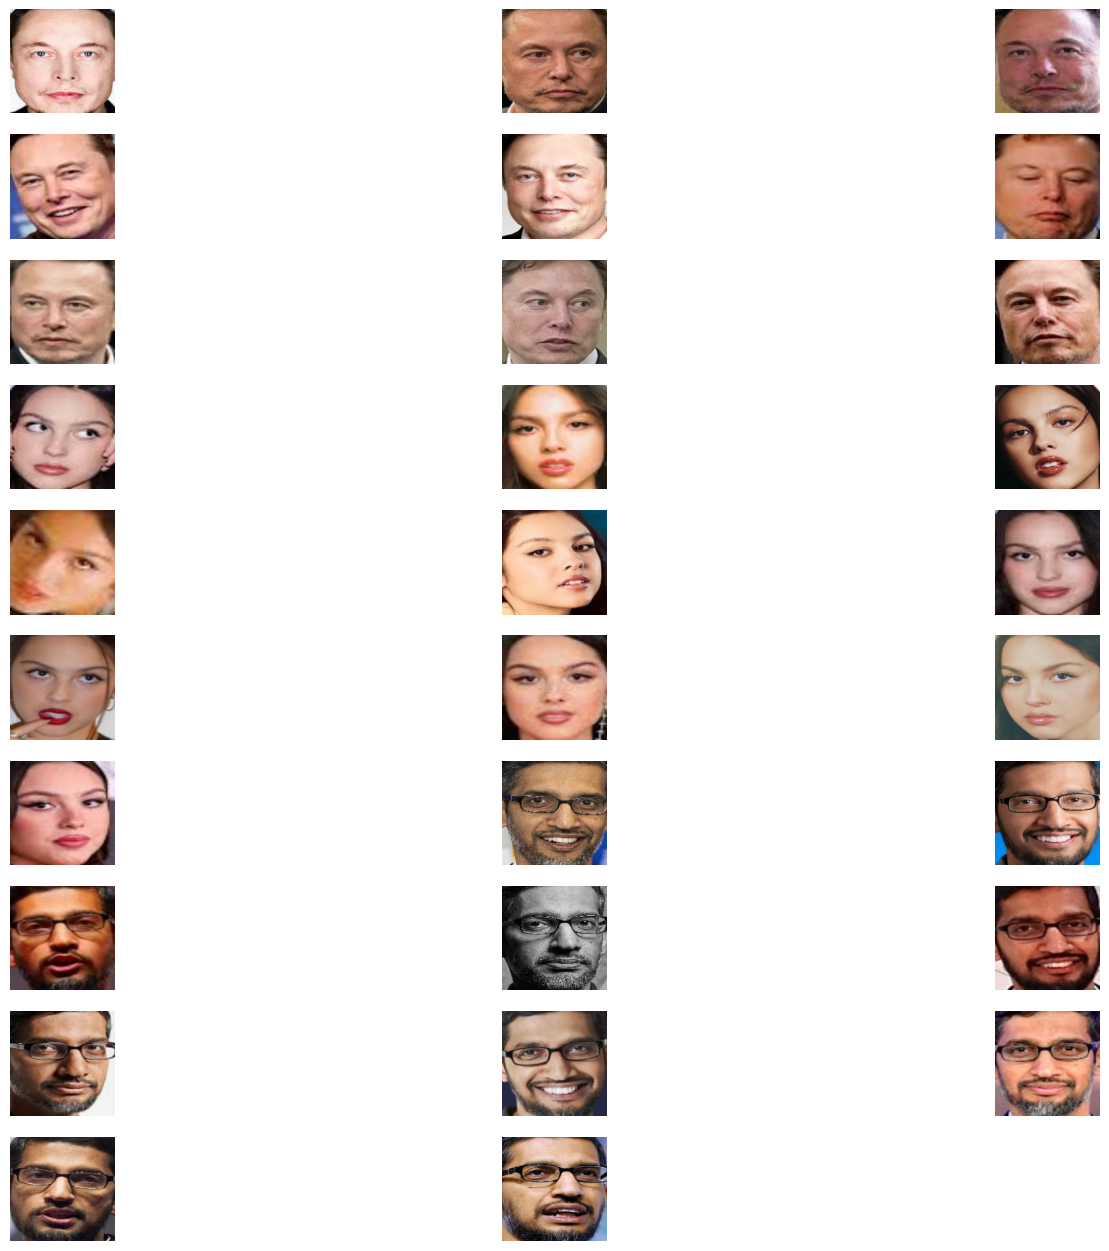

In [18]:
# plot the images
plot_images(x, y)

In [19]:
# embeddings
embedder = FaceNet()
def get_embeddings(img):
    # img = img.astype('float32')
    img = np.expand_dims(img, axis=0)
    embedding = embedder.embeddings(img)
    embedding = embedding[0]
    return embedding

embeddings = np.asarray([get_embeddings(face) for face in x])


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━

In [20]:
# save embeddings
np.savez_compressed("../packages/embeddings.npz", embeddings=embeddings, labels=y)

### Modelling

In [21]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [23]:
model = SVC(kernel='linear', probability=True)
model.fit(embeddings, y)

SVC(kernel='linear', probability=True)

In [24]:
yhat_train = model.predict(embeddings)

In [25]:
yhat_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
from sklearn. metrics import accuracy_score

accuracy_score(y, yhat_train)

1.0

### Testing Real Image

In [28]:
# detect face
path = "../database/Elon Musk/02.jpg"
img = cv.imread(path)
test_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_img)[0]['box']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [29]:
# get embedding
test_img = test_img[y:y+h, x:x+w]
test_img = cv.resize(test_img, (160, 160))
test_embedding = get_embeddings(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


In [30]:
test_embedding

array([ 1.01917580e-01,  1.09278411e-02,  2.13927105e-02, -6.51137382e-02,
        2.08980590e-02, -4.52142358e-02, -4.70964424e-02,  8.34386647e-02,
       -2.89635900e-02,  4.57580015e-02,  3.82859446e-02, -2.42789232e-04,
        5.79702742e-02, -1.28615536e-02, -1.82833113e-02,  1.40989916e-02,
        3.20017897e-02, -5.54551966e-02, -2.54425369e-02,  2.66327262e-02,
        3.82632343e-03,  5.49973771e-02, -4.49846387e-02, -1.07070357e-02,
       -1.13552622e-02, -2.61532515e-02, -4.83283121e-03, -6.35956228e-02,
       -1.26256589e-02, -6.24400098e-03, -4.93595302e-02, -1.34448539e-02,
        1.38562061e-02,  5.10599576e-02,  1.89850256e-02, -5.07683754e-02,
       -3.30635943e-02, -5.96531108e-02,  4.48282138e-02,  2.45387340e-03,
       -4.74343784e-02,  6.43981844e-02,  7.17660412e-02,  3.52912135e-02,
       -7.16111735e-02,  1.30296707e-01, -1.74638685e-02, -4.23450731e-02,
        9.64555051e-03,  4.75082686e-03, -5.60049620e-03, -1.15652932e-02,
        1.06086461e-02,  

In [31]:
yhat = model.predict_proba([test_embedding])

In [32]:
yhat

array([[0.84838759, 0.09016948, 0.06144293]])

In [33]:
yhat = np.argmax(yhat)
yhat = encoder.inverse_transform([yhat])
yhat[0]

'Elon Musk'

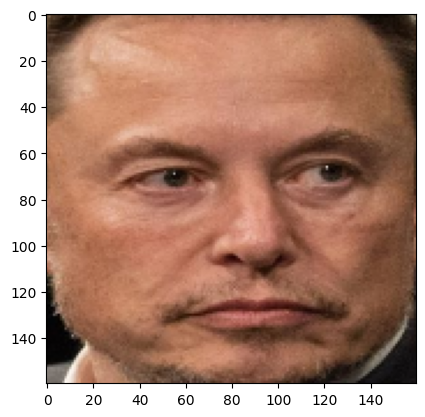

In [34]:
plt.imshow(test_img)

### Save the Model

In [35]:
with open("../packages/model.pkl", "wb") as f:
    pickle.dump(model, f)

In [36]:
with open("../packages/encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)